<a href="https://colab.research.google.com/github/Deepak-Mewada/Miscellaneous/blob/main/PSF_breathing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import csv
import scipy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import sys
import glob
from colorama import Back, Fore, Style
from scipy.ndimage import median_filter
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline

# CONSTANT FUNCTION

### Constant Magnitude 11

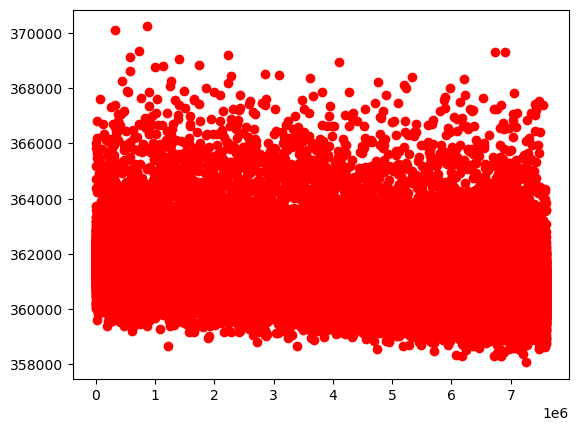

In [ ]:
constant_11=pd.read_csv('Constant_11.csv')
constant_11 = constant_11.dropna()
x_11=constant_11['Time']
y_11=constant_11['Est']
plt.scatter(x_11, y_11, color='red', label='Constant_11')

### Constant Magnitude 13

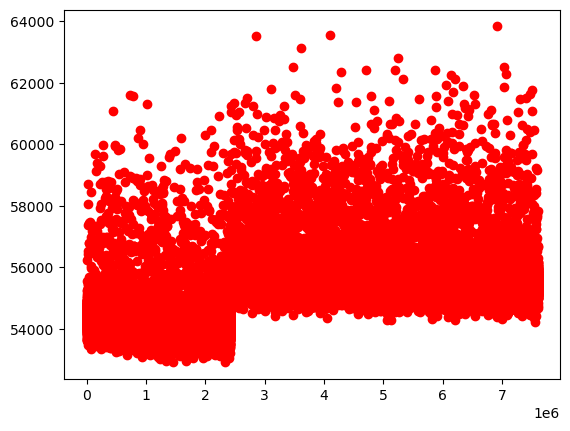

In [ ]:
constant_13=pd.read_csv('Constant_13.csv')
constant_13 = constant_13.dropna()
x_13=constant_13['Time']
y_13=constant_13['Est']
plt.scatter(x_13, y_13, color='red', label='Constant_13')

### Constant Magnitude 15

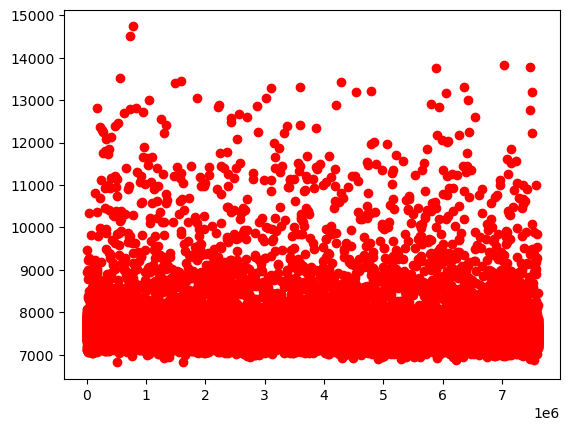

In [ ]:
constant_15=pd.read_csv('Constant_15.csv')
constant_15 = constant_15.dropna()
x_15=constant_15['Time']
y_15=constant_15['Est']
plt.scatter(x_15, y_15, color='red', label='Constant_15')

# LINEAR SIGMA

### Input Function

In [ ]:
pwd

'/content'

In [ ]:
linear_sigma=pd.read_csv('content/Linear_Sigma.csv')
x=linear_sigma['Time']
y=linear_sigma['Est']
plt.scatter(x, y, color='green', label='Linear Sigma')

FileNotFoundError: ignored

### Linear Sigma Magnitude 11

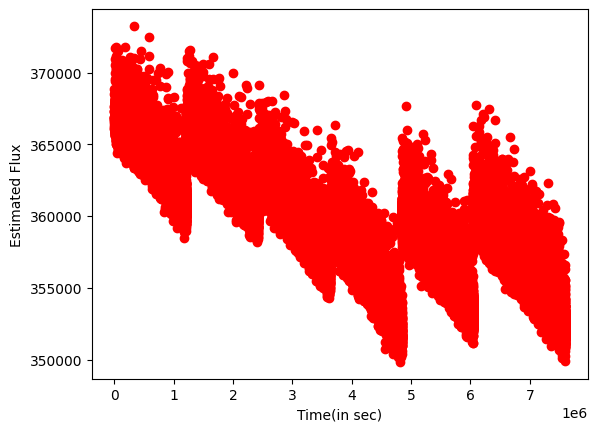

In [ ]:
linear_sigma_11=pd.read_csv('/content/Linear_Sigma_11.csv')
linear_sigma_11 = linear_sigma_11.dropna()
x=linear_sigma_11['Time']
y=linear_sigma_11['Est']
plt.xlabel('Time(in sec)')
plt.ylabel('Estimated Flux')
plt.scatter(x, y, color='red', label='Linear Sigma_11')

# KNN - To stich the data - Linear Magnitude 11

In [ ]:
# We chose 6 clusters based on number of peaks (or visibly 6 clusters)
kmeans = KMeans(6, random_state=0)
kmeans.fit(linear_sigma_11)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(linear_sigma_11)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_with_clusters = pd.DataFrame(linear_sigma_11.copy())
data_with_clusters['Clusters'] = identified_clusters 

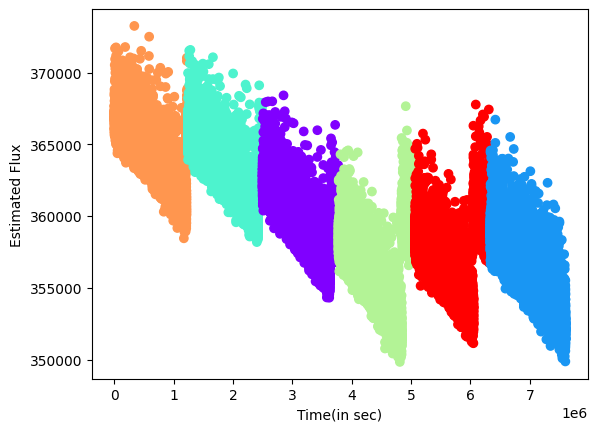

In [ ]:
# Plotting the clusters 
plt.scatter(data_with_clusters['Time'],data_with_clusters['Est'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Time(in sec)')
plt.ylabel('Estimated Flux')
plt.show()

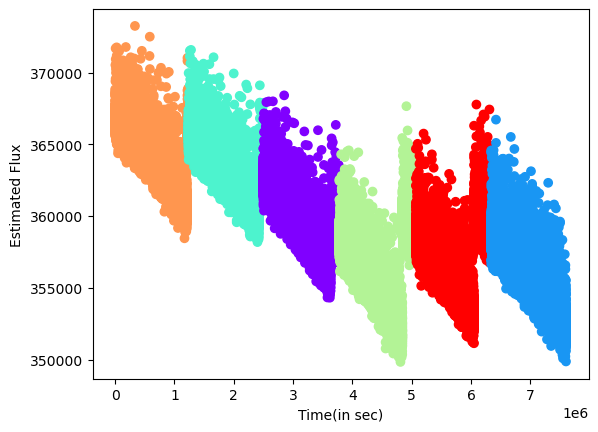

In [ ]:
data_with_clusters

,Est,Time,Clusters
0,366117.16,0.0,4
1,367632.01,50.0,4
2,366300.99,100.0,4
3,367312.06,150.0,4
4,366811.09,200.0,4
...,...,...,...
152059,351872.74,7600000.0,1
152060,352314.08,7600000.0,1
152061,352461.40,7600000.0,1
152062,353717.35,7600000.0,1


In [ ]:
# Creating a Dict to store multiple DF based on clusters
df_list = {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None}
for i in range(7):
    df_list[str(i)] = data_with_clusters.loc[data_with_clusters['Clusters'] == i]

In [ ]:
#order list order
for i in df_list.keys():
    print(df_list[i])

In [ ]:
df_list.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6'])

In [ ]:
df_list['3'].describe()

,Est,Time,Clusters
count,25800.000000,2.580000e+04,25800.0
mean,356077.432229,4.420000e+06,3.0
std,2440.654446,3.723870e+05,0.0
min,349835.340000,3.780000e+06,3.0
25%,354070.930000,4.100000e+06,3.0
50%,356152.850000,4.420000e+06,3.0
75%,358053.775000,4.740000e+06,3.0
max,367654.150000,5.060000e+06,3.0


In [ ]:
df_list['3'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25800 entries, 75500 to 101299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Est       25800 non-null  float64
 1   Time      25800 non-null  float64
 2   Clusters  25800 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 705.5 KB


In [ ]:
df_list1 =df_list
for df_name, df in df_list1.items():
    # create a boolean mask to select the rows with time points between 4850000 and 5060000
    mask1 = (df['Time'] >= 4850000) & (df['Time'] <= 5060000) 
    mask2 = (df['Time'] >= 6060000) & (df['Time'] <= 6330000)
    # calculate the mean of the "Est" column for the selected rows
    mean_est1 = (df.loc[mask1, 'Est'].max()-df.loc[mask1, 'Est'].min())/2
    mean_est2 = (df.loc[mask2, 'Est'].max()-df.loc[mask2, 'Est'].min())/2
    # subtract the mean from the "Est" column for the selected rows
    df.loc[mask1, 'Est'] -= mean_est1
    df.loc[mask2, 'Est'] -= mean_est2


In [ ]:
np.mean(df_list['3']['Est'])

355131.8875782946

In [ ]:
# We chose the order list based on the timestamp and cluster number reated to it
order_list = [4,2,0,3,5,1]
ndf = pd.DataFrame(columns = ['Est', 'Time', 'Clusters'])
low_list = []
# Looping over all clusters
for i in range(len(order_list)-1):
    
    # Find min value of 1st Cluster
    low_1 = min(df_list[str(order_list[i])]['Est'])
    # Find min value of 1000 samples from next cluster
    low_2 = min(df_list[str(order_list[i+1])]['Est'][:1000])
    
    # Finding how much we need to move the 2nd cluster
    sub = abs(low_2 - low_1)
    
    # Storing the lowest points to understand visually how much we moved
    low_list.append([low_1, float(df_list[str(order_list[i])].iloc[[-1]]['Time'])])
    low_list.append([low_2, float(df_list[str(order_list[i+1])].iloc[[1]]['Time'])])
       
    # Moving the next cluster by margin amount
    df_list[str(order_list[i+1])]['Est'] -= sub

<ipython-input-177-15e2b2f438a1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[str(order_list[i+1])]['Est'] -= sub


In [ ]:
ndf = pd.concat(df_list.values())
# Converting 2D array into 2 1D arrays
low_value = []
time_value = []
for i in low_list:
    low_value.append(i[0])
    time_value.append(i[1])

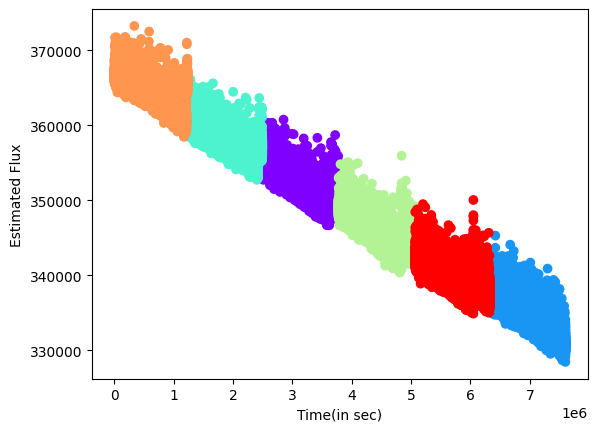

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
#plt.scatter(time_value, low_value, c='black')
plt.xlabel('Time(in sec)')
plt.ylabel('Estimated Flux')
# Setting the limits of the x-axis and y-axis

plt.show()

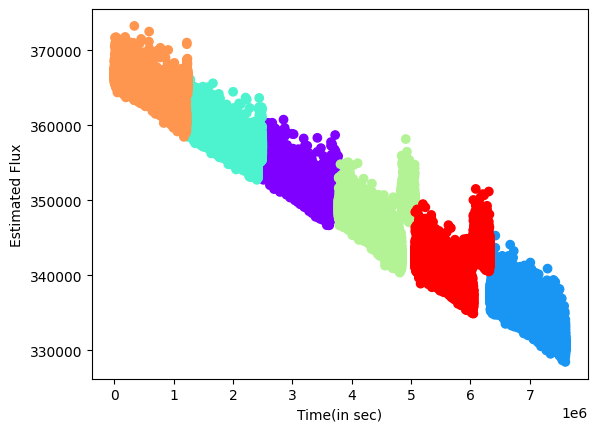

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
#plt.scatter(time_value, low_value, c='black')
plt.xlabel('Time(in sec)')
plt.ylabel('Estimated Flux')
# Setting the limits of the x-axis and y-axis

plt.show()

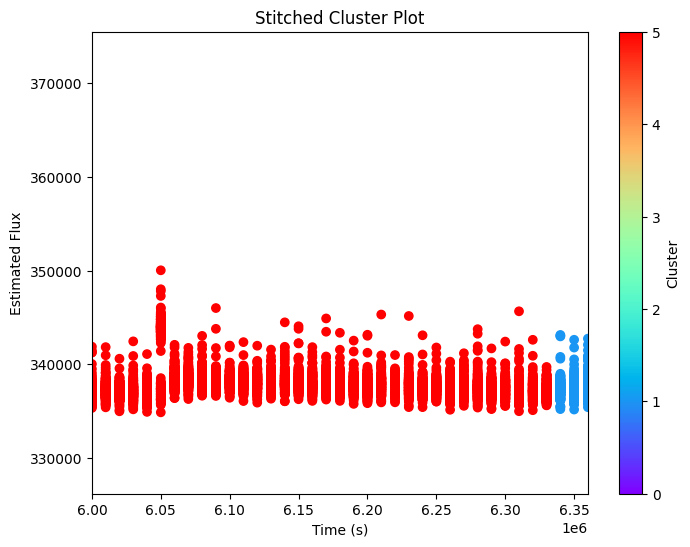

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the stitched cluster
scatter = ax.scatter(ndf['Time'], ndf['Est'], c=ndf['Clusters'], cmap='rainbow')

# Add a colorbar
cbar = fig.colorbar(scatter, ax=ax, label='Cluster')

# Set axis labels and limits
ax.set_xlabel('Time (s)')
ax.set_ylabel('Estimated Flux')
ax.set_xlim([6000000.0, 6360000.0])
#ax.set_ylim([0, 10])

# Add a title
ax.set_title('Stitched Cluster Plot')

# Show the plot
plt.show()


In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = ndf['Time']
est_pandas=ndf['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))

NameError: ignored

In [ ]:
# OLS model -> here sim is an numpy array with a time and flux column
x1=time_pandas
y1=est_pandas
flux_med=[]
sim = np.column_stack((x1, y1))
sim = sim.rename(columns={'time_pandas':'x', 'flux_pandas':'y', 'flux_med':'y_med'})
sim['x'] = sim['x'].subtract(sim['x'].min())
lsFit = sm.OLS.from_formula(formula=model, data=sim).fit()
lsFit.summary(alpha=0.05)

# Plot regression model and residuals
plot_modelfit(sim, lsFit, model, theme='g', xlab='Time [days]', ylab='Flux [ppm]')
plot_residuals(sim, lsFit, reg='x', theme='g')
plot_standardized_residuals(sim, lsFit, K=3, reg='x')

AttributeError: 'numpy.ndarray' object has no attribute 'rename'

### Model Fit - Linear Sigma Magnitude 11

Plot Detrended Data

In [ ]:
x = time_numpy
y = est_numpy
# Fit a degree-3 polynomial to the data
p = np.polyfit(x, y, deg=3)
y_fit = np.polyval(p, x)

# Subtract the polynomial fit from the original data to obtain the detrended data
y_detrended = est_numpy - y_fit

# Plot the original data, the polynomial fit, and the detrended data
plt.plot(time_numpy, est_numpy, label='Original data')
plt.plot(x, y_fit, label='Polynomial fit')
plt.xlabel('Time(in sec)')
plt.ylabel('Estimated Flux')
#plt.plot(x, y_detrended, label='Detrended data')
plt.legend()
plt.show()

NameError: ignored

### Pearson Correlation - Linear Sigma Magnitude 11

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_11)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.030573019740516644
p-value: 8.794145441363558e-33


### Linear Sigma Magnitude 13

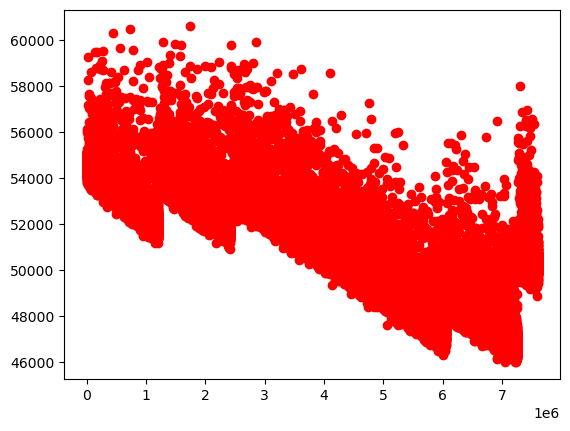

In [ ]:
linear_sigma_13=pd.read_csv('Linear_Sigma_13.csv')
linear_sigma_13 = linear_sigma_13.dropna()
x=linear_sigma_13['Time']
y=linear_sigma_13['Est']
plt.scatter(x, y, color='red', label='Linear Sigma_13')

# KNN - To stich the data

In [ ]:
# We chose 6 clusters based on number of peaks (or visibly 6 clusters)
kmeans = KMeans(6, random_state=0)
kmeans.fit(linear_sigma_13)

KMeans(n_clusters=6, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(linear_sigma_13)

In [ ]:
data_with_clusters = pd.DataFrame(linear_sigma_13.copy())
data_with_clusters['Clusters'] = identified_clusters 

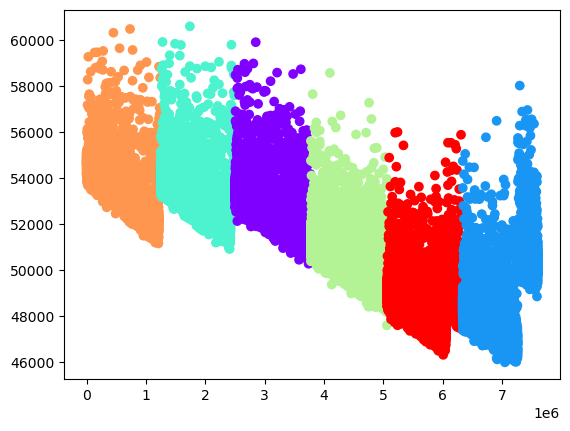

In [ ]:
# Plotting the clusters 
plt.scatter(data_with_clusters['Time'],data_with_clusters['Est'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

In [ ]:
data_with_clusters

,Est,Time,Clusters
0,55078.29810,0.0,4
1,54255.27710,50.0,4
2,54377.36548,100.0,4
3,54983.57446,150.0,4
4,54217.38696,200.0,4
...,...,...,...
152059,49950.08911,7600000.0,1
152060,50333.88501,7600000.0,1
152061,50239.86523,7600000.0,1
152062,50051.82886,7600000.0,1


In [ ]:
# Creating a Dict to store multiple DF based on clusters
df_list = {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None}
for i in range(7):
    df_list[str(i)] = data_with_clusters.loc[data_with_clusters['Clusters'] == i]

In [ ]:
#order list order
for i in df_list.keys():
    print(df_list[i])

In [ ]:
# We chose the order list based on the timestamp and cluster number reated to it
order_list = [4,2,0,3,5,1]
ndf = pd.DataFrame(columns = ['Est', 'Time', 'Clusters'])
low_list = []
# Looping over all clusters
for i in range(len(order_list)-1):
    
    # Find min value of 1st Cluster
    low_1 = min(df_list[str(order_list[i])]['Est'])
    # Find min value of 1000 samples from next cluster
    low_2 = min(df_list[str(order_list[i+1])]['Est'][:1000])
    
    # Finding how much we need to move the 2nd cluster
    sub = abs(low_2 - low_1)
    
    # Storing the lowest points to understand visually how much we moved
    low_list.append([low_1, float(df_list[str(order_list[i])].iloc[[-1]]['Time'])])
    low_list.append([low_2, float(df_list[str(order_list[i+1])].iloc[[1]]['Time'])])
       
    # Moving the next cluster by margin amount
    df_list[str(order_list[i+1])]['Est'] -= sub

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\3814616976.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[str(order_list[i+1])]['Est'] -= sub


In [ ]:
ndf = pd.concat(df_list.values())
# Converting 2D array into 2 1D arrays
low_value = []
time_value = []
for i in low_list:
    low_value.append(i[0])
    time_value.append(i[1])

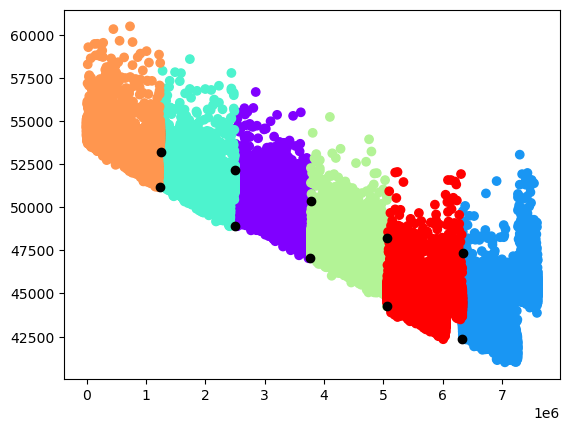

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
plt.scatter(time_value, low_value, c='black')
plt.show()

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = ndf['Time']
est_pandas=ndf['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


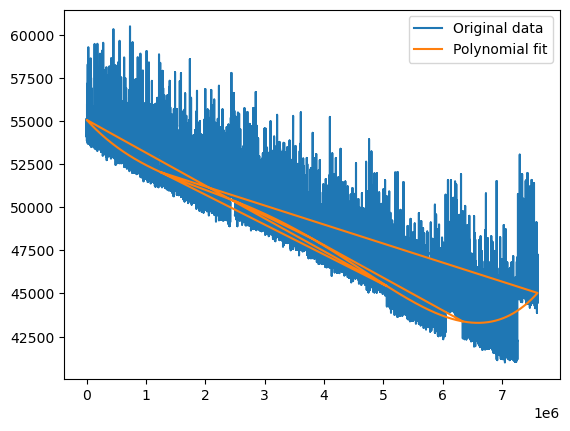

In [ ]:
#Data
x = time_numpy
y = est_numpy
# Fit a degree-3 polynomial to the data
p = np.polyfit(x, y, deg=4)
y_fit = np.polyval(p, x)

# Subtract the polynomial fit from the original data to obtain the detrended data
y_detrended = est_numpy - y_fit

# Plot the original data, the polynomial fit, and the detrended data
plt.plot(time_numpy, est_numpy, label='Original data')
plt.plot(x, y_fit, label='Polynomial fit')
#plt.plot(x, y_detrended, label='Detrended data')
plt.legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_13)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.14432810230023216
p-value: 0.0


### Linear Sigma Magnitude 15

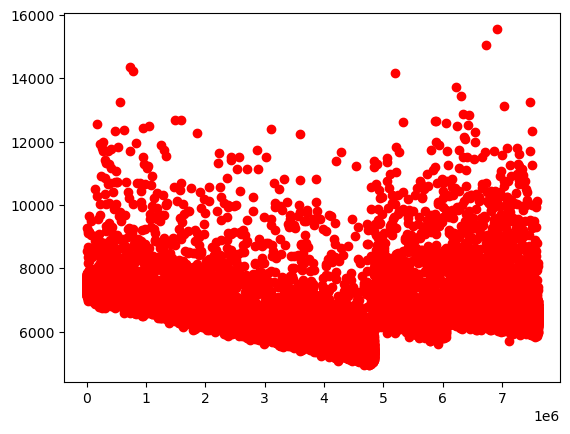

In [ ]:
linear_sigma_15=pd.read_csv('Linear_Sigma_15.csv')
linear_sigma_15 = linear_sigma_15.dropna()
x=linear_sigma_15['Time']
y=linear_sigma_15['Est']
plt.scatter(x, y, color='red', label='Linear Sigma_15')

# KNN - To stich the data

In [ ]:
# We chose 6 clusters based on number of peaks (or visibly 6 clusters)
kmeans = KMeans(6, random_state=0)
kmeans.fit(linear_sigma_15)

KMeans(n_clusters=6, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(linear_sigma_15)

In [ ]:
data_with_clusters = pd.DataFrame(linear_sigma_15.copy())
data_with_clusters['Clusters'] = identified_clusters 

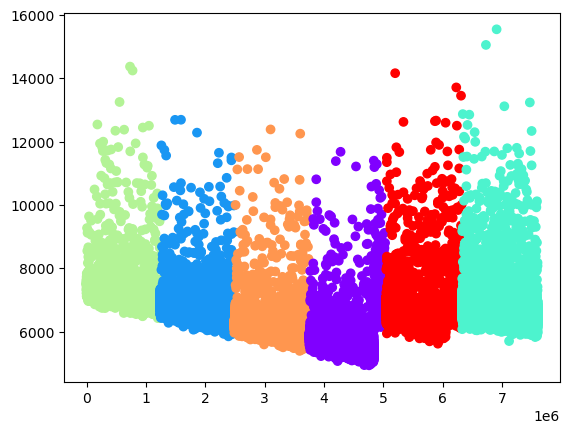

In [ ]:
# Plotting the clusters 
plt.scatter(data_with_clusters['Time'],data_with_clusters['Est'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

In [ ]:
data_with_clusters


,Est,Time,Clusters
0,7514.839844,0.0,3
1,7317.679688,50.0,3
2,7563.252441,100.0,3
3,7229.273926,150.0,3
4,7666.393066,200.0,3
...,...,...,...
152059,6121.799316,7600000.0,2
152060,6375.791016,7600000.0,2
152061,6385.614014,7600000.0,2
152062,6537.166992,7600000.0,2


In [ ]:
# Creating a Dict to store multiple DF based on clusters
df_list = {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None}
for i in range(7):
    df_list[str(i)] = data_with_clusters.loc[data_with_clusters['Clusters'] == i]

In [ ]:
#order list order
for i in df_list.keys():
    print(df_list[i])

                Est       Time  Clusters
75101   5681.636963  3760000.0         0
75103   5814.947510  3760000.0         0
75104   5841.609619  3760000.0         0
75105   5964.395996  3760000.0         0
75106   5686.548340  3760000.0         0
...             ...        ...       ...
100895  6629.166748  5040000.0         0
100896  6626.359131  5040000.0         0
100897  6504.275391  5040000.0         0
100898  6805.277588  5040000.0         0
100899  6563.213135  5040000.0         0

[25758 rows x 3 columns]
               Est       Time  Clusters
24700  7007.847900  1240000.0         1
24701  6798.760010  1240000.0         1
24702  6896.287598  1240000.0         1
24703  6936.983154  1240000.0         1
24704  6868.924072  1240000.0         1
...            ...        ...       ...
49893  6567.511719  2490000.0         1
49895  6632.764404  2490000.0         1
49896  6474.896240  2490000.0         1
49898  6509.978027  2490000.0         1
49899  6659.426270  2490000.0         1

[

In [ ]:
# We chose the order list based on the timestamp and cluster number reated to it
order_list = [3,1,4,0,5,2]
ndf = pd.DataFrame(columns = ['Est', 'Time', 'Clusters'])
low_list = []
# Looping over all clusters
for i in range(len(order_list)-1):
    
    # Find min value of 1st Cluster
    low_1 = min(df_list[str(order_list[i])]['Est'])
    # Find min value of 1000 samples from next cluster
    low_2 = min(df_list[str(order_list[i+1])]['Est'][:1000])
    
    # Finding how much we need to move the 2nd cluster
    sub = abs(low_2 - low_1)
    
    # Storing the lowest points to understand visually how much we moved
    low_list.append([low_1, float(df_list[str(order_list[i])].iloc[[-1]]['Time'])])
    low_list.append([low_2, float(df_list[str(order_list[i+1])].iloc[[1]]['Time'])])
       
    # Moving the next cluster by margin amount
    df_list[str(order_list[i+1])]['Est'] -= sub

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\1038768699.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[str(order_list[i+1])]['Est'] -= sub


In [ ]:
ndf = pd.concat(df_list.values())
# Converting 2D array into 2 1D arrays
low_value = []
time_value = []
for i in low_list:
    low_value.append(i[0])
    time_value.append(i[1])

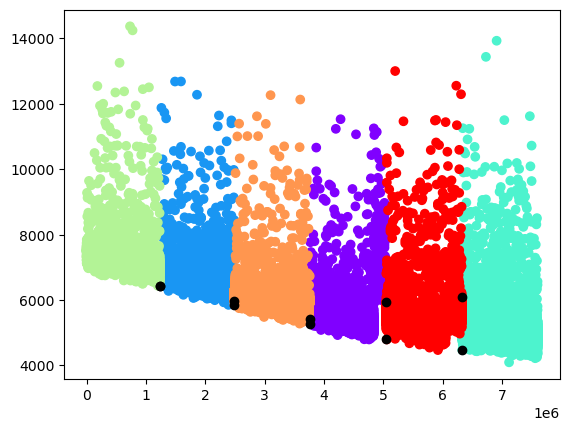

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
plt.scatter(time_value, low_value, c='black')
plt.show()

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = ndf['Time']
est_pandas=ndf['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


Plot detrended data

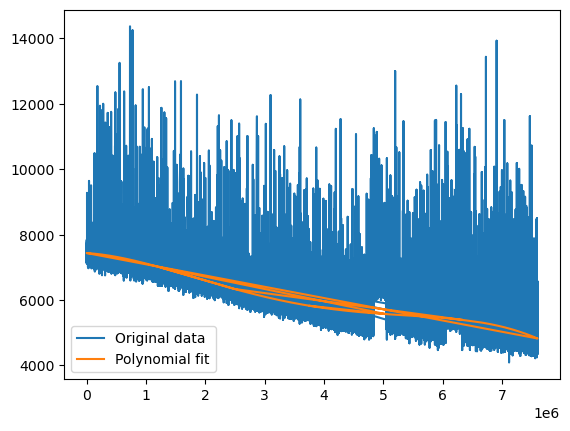

In [ ]:
#Data
x = time_numpy
y = est_numpy
# Fit a degree-3 polynomial to the data
p = np.polyfit(x, y, deg=4)
y_fit = np.polyval(p, x)

# Subtract the polynomial fit from the original data to obtain the detrended data
y_detrended = est_numpy - y_fit

# Plot the original data, the polynomial fit, and the detrended data
plt.plot(time_numpy, est_numpy, label='Original data')
plt.plot(x, y_fit, label='Polynomial fit')
#plt.plot(x, y_detrended, label='Detrended data')
plt.legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_15)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.00159562273984666
p-value: 0.5338008320298151


# POLYNOMIAL FUNCTION 

### Input Function

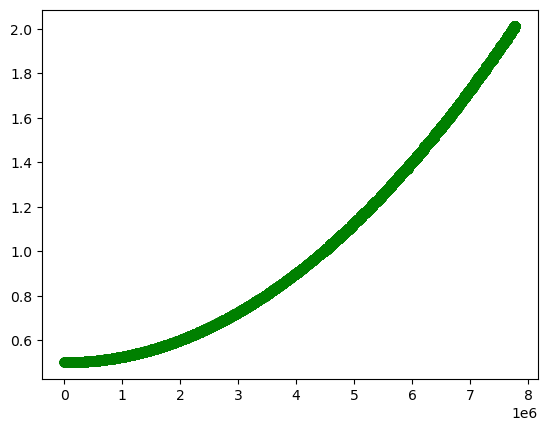

In [ ]:
polynomial=pd.read_csv('Polynomial.csv')
x=polynomial['Time']
y=polynomial['Est']
plt.scatter(x, y, color='green', label='Polynomial')

Polynomial Magnitude 11

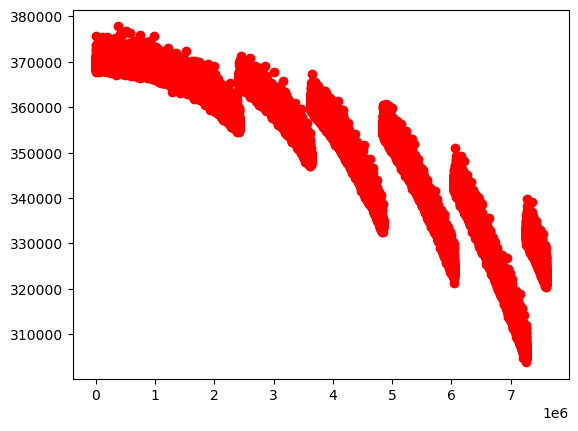

In [ ]:
polynomial_11=pd.read_csv('Poly_11.csv')
polynomial_11 = polynomial_11.dropna()
x=polynomial_11['Time']
y=polynomial_11['Est']
plt.scatter(x, y, color='red', label='Polynomial_11')

# KNN - To stich the data

In [ ]:
# We chose 6 clusters based on number of peaks (or visibly 6 clusters)
kmeans = KMeans(6, random_state=0)
kmeans.fit(polynomial_11)

KMeans(n_clusters=6, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(polynomial_11)

In [ ]:
data_with_clusters = pd.DataFrame(polynomial_11.copy())
data_with_clusters['Clusters'] = identified_clusters 

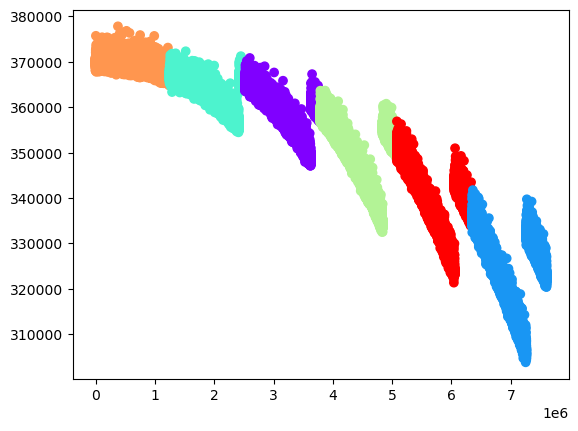

In [ ]:
# Plotting the clusters 
plt.scatter(data_with_clusters['Time'],data_with_clusters['Est'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

In [ ]:
data_with_clusters

,Est,Time,Clusters
0,369534.1221,0.0,4
1,370919.1611,50.0,4
2,369440.8037,100.0,4
3,370123.5107,150.0,4
4,369830.9331,200.0,4
...,...,...,...
152059,322140.4326,7600000.0,1
152060,322519.3154,7600000.0,1
152061,322156.5752,7600000.0,1
152062,322057.6431,7600000.0,1


In [ ]:
# Creating a Dict to store multiple DF based on clusters
df_list = {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None}
for i in range(7):
    df_list[str(i)] = data_with_clusters.loc[data_with_clusters['Clusters'] == i]

In [ ]:
#order list order
for i in df_list.keys():
    print(df_list[i])

               Est       Time  Clusters
50300  365742.1992  2520000.0         0
50301  366506.2852  2520000.0         0
50302  366290.1733  2520000.0         0
50303  365976.5439  2520000.0         0
50304  365531.7251  2520000.0         0
...            ...        ...       ...
75695  358612.1619  3780000.0         0
75696  358473.9451  3780000.0         0
75697  361091.7390  3780000.0         0
75698  357789.1433  3780000.0         0
75699  358624.8020  3780000.0         0

[25400 rows x 3 columns]
                Est       Time  Clusters
126900  335428.2551  6350000.0         1
126901  335946.7615  6350000.0         1
126902  335835.1980  6350000.0         1
126903  335319.4998  6350000.0         1
126904  334921.6819  6350000.0         1
...             ...        ...       ...
152059  322140.4326  7600000.0         1
152060  322519.3154  7600000.0         1
152061  322156.5752  7600000.0         1
152062  322057.6431  7600000.0         1
152063  321906.1025  7600000.0         1

[

In [ ]:
# We chose the order list based on the timestamp and cluster number reated to it
order_list = [4,2,0,3,5,1]
ndf = pd.DataFrame(columns = ['Est', 'Time', 'Clusters'])
low_list = []
# Looping over all clusters
for i in range(len(order_list)-1):
    
    # Find min value of 1st Cluster
    low_1 = min(df_list[str(order_list[i])]['Est'])
    # Find min value of 1000 samples from next cluster
    low_2 = min(df_list[str(order_list[i+1])]['Est'][:1000])
    
    # Finding how much we need to move the 2nd cluster
    sub = abs(low_2 - low_1)
    
    # Storing the lowest points to understand visually how much we moved
    low_list.append([low_1, float(df_list[str(order_list[i])].iloc[[-1]]['Time'])])
    low_list.append([low_2, float(df_list[str(order_list[i+1])].iloc[[1]]['Time'])])
       
    # Moving the next cluster by margin amount
    df_list[str(order_list[i+1])]['Est'] -= sub

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\3814616976.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[str(order_list[i+1])]['Est'] -= sub


In [ ]:
ndf = pd.concat(df_list.values())
# Converting 2D array into 2 1D arrays
low_value = []
time_value = []
for i in low_list:
    low_value.append(i[0])
    time_value.append(i[1])

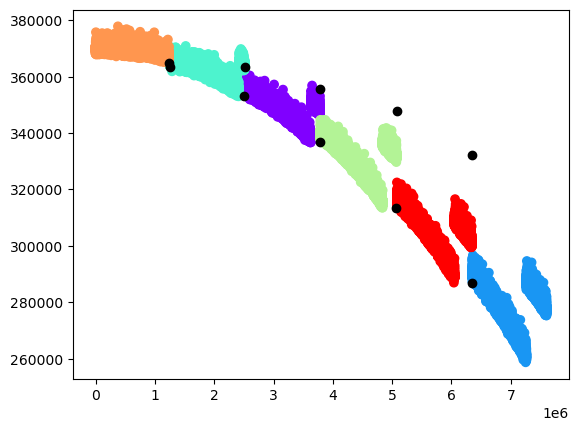

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
plt.scatter(time_value, low_value, c='black')
plt.show()

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = ndf['Time']
est_pandas=ndf['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


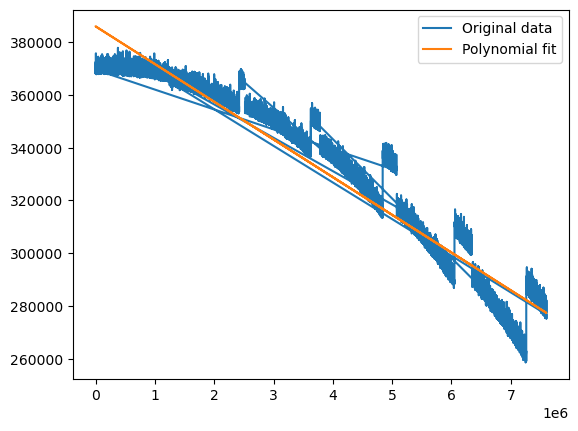

In [ ]:
# Generate some example data
x = time_numpy
y = est_numpy
# Fit a degree-3 polynomial to the data
p = np.polyfit(x, y,deg=1)
y_fit = np.polyval(p, x)

# Subtract the polynomial fit from the original data to obtain the detrended data
y_detrended = est_numpy - y_fit

# Plot the original data, the polynomial fit, and the detrended data
plt.plot(time_numpy, est_numpy, label='Original data')
plt.plot(x, y_fit, label='Polynomial fit')
#plt.plot(x, y_detrended, label='Detrended data')
plt.legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_11)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.044140794378180276
p-value: 1.8437204207071864e-66


### Polynomial Magnitude 13

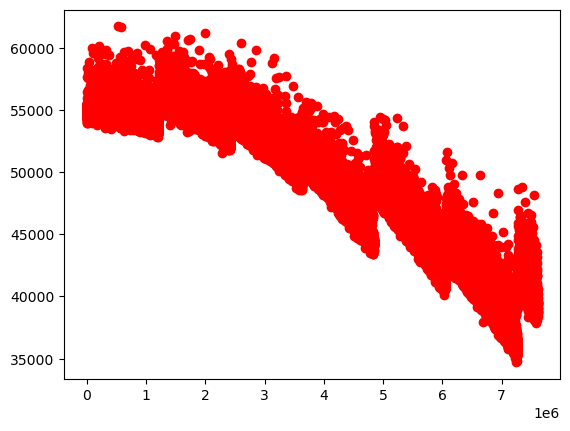

In [ ]:
polynomial_13=pd.read_csv('Poly_13.csv')
polynomial_13 = polynomial_13.dropna()
x=polynomial_13['Time']
y=polynomial_13['Est']
plt.scatter(x, y, color='red', label='Polynomial_13')

# KNN To stich the data - Magnitude 13

In [ ]:
# We chose 6 clusters based on number of peaks (or visibly 6 clusters)
kmeans = KMeans(6, random_state=0)
kmeans.fit(polynomial_13)

KMeans(n_clusters=6, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(polynomial_13)

In [ ]:
data_with_clusters = pd.DataFrame(polynomial_13.copy())
data_with_clusters['Clusters'] = identified_clusters

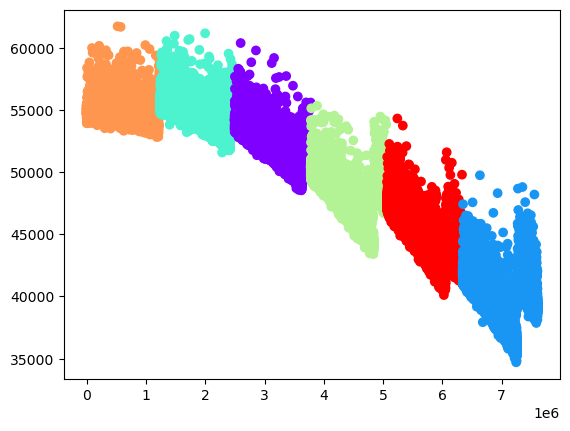

In [ ]:
# Plotting the clusters 
plt.scatter(data_with_clusters['Time'],data_with_clusters['Est'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

In [ ]:
data_with_clusters

,Est,Time,Clusters
0,54954.10815,0,4
1,55326.67749,50,4
2,54819.39478,100,4
3,54701.51733,150,4
4,55141.44458,200,4
...,...,...,...
152059,38450.84741,7602950,1
152060,39035.30908,7603000,1
152061,39582.58496,7603050,1
152062,39491.37231,7603100,1


In [ ]:
# Creating a Dict to store multiple DF based on clusters
df_list = {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None}
for i in range(7):
    df_list[str(i)] = data_with_clusters.loc[data_with_clusters['Clusters'] == i]

In [ ]:
#order list order
for i in df_list.keys():
    print(df_list[i])

               Est     Time  Clusters
49934  53215.74170  2496700         0
49935  54181.19092  2496750         0
49936  53668.99268  2496800         0
49937  53527.96680  2496850         0
49938  54214.86816  2496900         0
...            ...      ...       ...
75578  50104.33325  3778900         0
75579  50497.95142  3778950         0
75580  53286.95874  3779000         0
75581  49708.61157  3779050         0
75582  50308.51050  3779100         0

[25649 rows x 3 columns]
                Est     Time  Clusters
126831  42327.26636  6341550         1
126832  41673.34229  6341600         1
126833  41628.43604  6341650         1
126834  41913.29980  6341700         1
126835  41721.05005  6341750         1
...             ...      ...       ...
152059  38450.84741  7602950         1
152060  39035.30908  7603000         1
152061  39582.58496  7603050         1
152062  39491.37231  7603100         1
152063  38739.92139  7603150         1

[25233 rows x 3 columns]
               Est     T

In [ ]:
# We chose the order list based on the timestamp and cluster number reated to it
order_list = [4,2,0,3,5,1]
ndf = pd.DataFrame(columns = ['Est', 'Time', 'Clusters'])
low_list = []
# Looping over all clusters
for i in range(len(order_list)-1):
    
    # Find min value of 1st Cluster
    low_1 = min(df_list[str(order_list[i])]['Est'])
    # Find min value of 1000 samples from next cluster
    low_2 = min(df_list[str(order_list[i+1])]['Est'][:1000])
    
    # Finding how much we need to move the 2nd cluster
    sub = abs(low_2 - low_1)
    
    # Storing the lowest points to understand visually how much we moved
    low_list.append([low_1, float(df_list[str(order_list[i])].iloc[[-1]]['Time'])])
    low_list.append([low_2, float(df_list[str(order_list[i+1])].iloc[[1]]['Time'])])
       
    # Moving the next cluster by margin amount
    df_list[str(order_list[i+1])]['Est'] -= sub

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\3814616976.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[str(order_list[i+1])]['Est'] -= sub


In [ ]:
ndf = pd.concat(df_list.values())
# Converting 2D array into 2 1D arrays
low_value = []
time_value = []
for i in low_list:
    low_value.append(i[0])
    time_value.append(i[1])

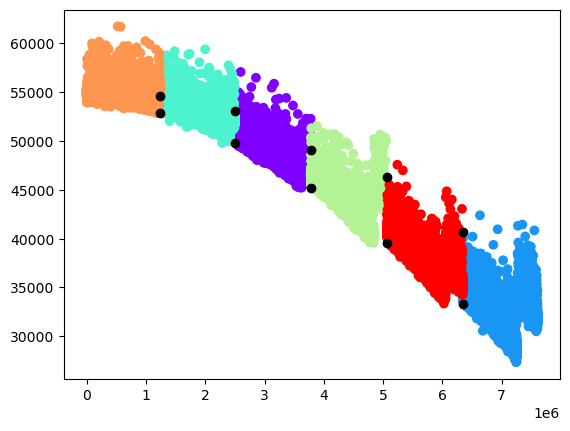

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
plt.scatter(time_value, low_value, c='black')
plt.show()

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = ndf['Time']
est_pandas=ndf['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


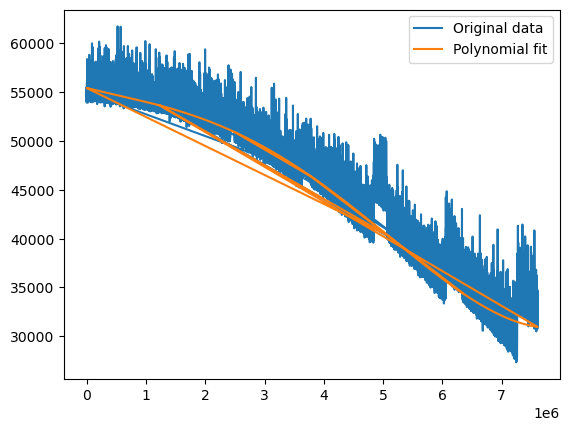

In [ ]:
# Data
x = time_numpy
y = est_numpy
# Fit a degree-3 polynomial to the data
p = np.polyfit(x, y,deg=4)
y_fit = np.polyval(p, x)

# Subtract the polynomial fit from the original data to obtain the detrended data
y_detrended = est_numpy - y_fit

# Plot the original data, the polynomial fit, and the detrended data
plt.plot(time_numpy, est_numpy, label='Original data')
plt.plot(x, y_fit, label='Polynomial fit')
#plt.plot(x, y_detrended, label='Detrended data')
plt.legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_13)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.19201946410687865
p-value: 0.0


### Polynomial Magnitude 15

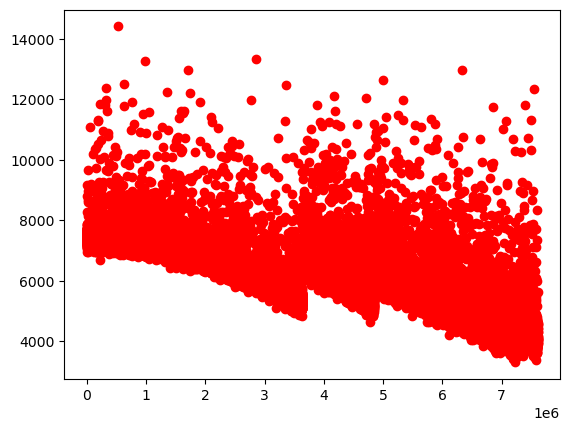

In [ ]:
polynomial_15=pd.read_csv('Poly_15.csv')
polynomial_15 = polynomial_15.dropna()
x=polynomial_15['Time']
y=polynomial_15['Est']
plt.scatter(x, y, color='red', label='Polynomial_15')

# KNN - To stich the data - Polynomial Magnitude 15

In [ ]:
# We chose 6 clusters based on number of peaks (or visibly 6 clusters)
kmeans = KMeans(6, random_state=0)
kmeans.fit(polynomial_15)

KMeans(n_clusters=6, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(polynomial_15)

In [ ]:
data_with_clusters = pd.DataFrame(polynomial_15.copy())
data_with_clusters['Clusters'] = identified_clusters

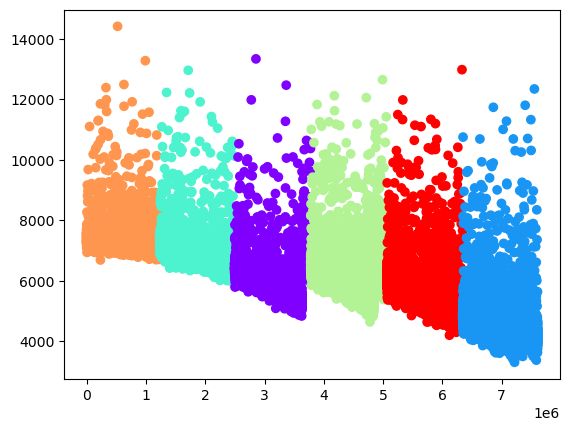

In [ ]:
# Plotting the clusters 
plt.scatter(data_with_clusters['Time'],data_with_clusters['Est'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

In [ ]:
data_with_clusters

,Est,Time,Clusters
0,7596.229492,0,4
1,7246.815186,50,4
2,7408.892578,100,4
3,7490.282715,150,4
4,7418.715820,200,4
...,...,...,...
152059,3928.494873,7602950,1
152060,4303.168457,7603000,1
152061,4290.539063,7603050,1
152062,4432.971191,7603100,1


In [ ]:
# Creating a Dict to store multiple DF based on clusters
df_list = {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None}
for i in range(7):
    df_list[str(i)] = data_with_clusters.loc[data_with_clusters['Clusters'] == i]

In [ ]:
#order list order
for i in df_list.keys():
    print(df_list[i])

               Est     Time  Clusters
49933  6507.872803  2496650         0
49934  6441.918701  2496700         0
49935  6427.185059  2496750         0
49936  6270.018555  2496800         0
49937  6375.263916  2496850         0
...            ...      ...       ...
75577  6170.296143  3778850         0
75578  6760.372314  3778900         0
75579  6829.834473  3778950         0
75580  9615.330078  3779000         0
75581  6299.397949  3779050         0

[25649 rows x 3 columns]
                Est     Time  Clusters
126831  4850.628662  6341550         1
126832  4976.923584  6341600         1
126833  4808.530518  6341650         1
126834  4833.087891  6341700         1
126835  4955.173096  6341750         1
...             ...      ...       ...
152059  3928.494873  7602950         1
152060  4303.168457  7603000         1
152061  4290.539063  7603050         1
152062  4432.971191  7603100         1
152063  3922.881592  7603150         1

[25233 rows x 3 columns]
               Est     T

In [ ]:
# We chose the order list based on the timestamp and cluster number reated to it
order_list = [4,2,0,3,5,1]
ndf = pd.DataFrame(columns = ['Est', 'Time', 'Clusters'])
low_list = []
# Looping over all clusters
for i in range(len(order_list)-1):
    
    # Find min value of 1st Cluster
    low_1 = min(df_list[str(order_list[i])]['Est'])
    # Find min value of 1000 samples from next cluster
    low_2 = min(df_list[str(order_list[i+1])]['Est'][:1000])
    
    # Finding how much we need to move the 2nd cluster
    sub = abs(low_2 - low_1)
    
    # Storing the lowest points to understand visually how much we moved
    low_list.append([low_1, float(df_list[str(order_list[i])].iloc[[-1]]['Time'])])
    low_list.append([low_2, float(df_list[str(order_list[i+1])].iloc[[1]]['Time'])])
       
    # Moving the next cluster by margin amount
    df_list[str(order_list[i+1])]['Est'] -= sub

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\3814616976.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[str(order_list[i+1])]['Est'] -= sub


In [ ]:
ndf = pd.concat(df_list.values())
# Converting 2D array into 2 1D arrays
low_value = []
time_value = []
for i in low_list:
    low_value.append(i[0])
    time_value.append(i[1])

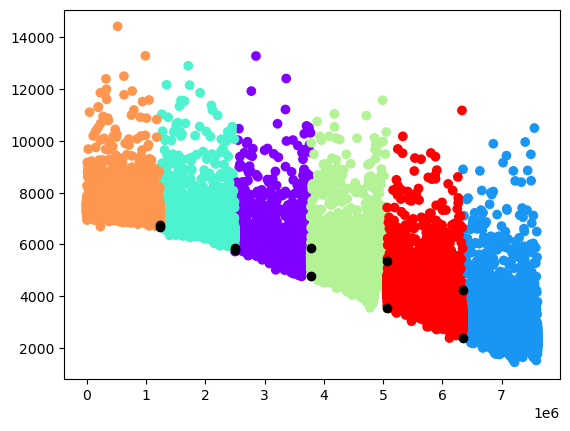

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
plt.scatter(time_value, low_value, c='black')
plt.show()

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = ndf['Time']
est_pandas=ndf['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


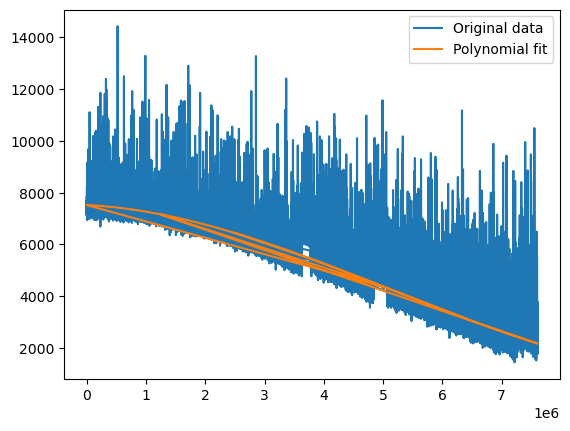

In [ ]:
# Data
x = time_numpy
y = est_numpy
# Fit a degree-3 polynomial to the data
p = np.polyfit(x, y, deg=3)
y_fit = np.polyval(p, x)

# Subtract the polynomial fit from the original data to obtain the detrended data
y_detrended = est_numpy - y_fit

# Plot the original data, the polynomial fit, and the detrended data
plt.plot(time_numpy, est_numpy, label='Original data')
plt.plot(x, y_fit, label='Polynomial fit')
#plt.plot(x, y_detrended, label='Detrended data')
plt.legend()
plt.show()

### Pearson Coorealation

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_15)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.0015630172032487714
p-value: 0.5421931207369223


# SINUSOIDAL FUNCTION

### Input function

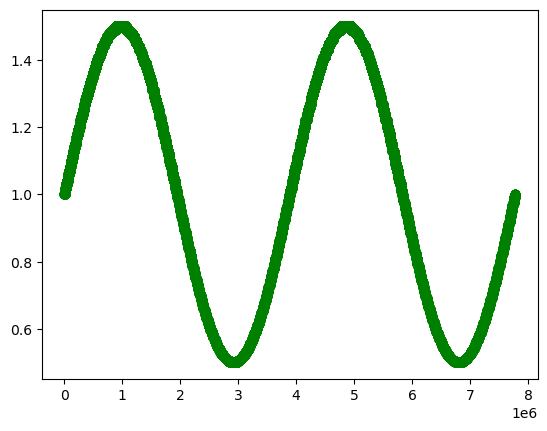

In [ ]:
sinusoidal=pd.read_csv('Sinusoidal.csv')
x=sinusoidal['Time']
y=sinusoidal['Est']
plt.scatter(x, y, color='green', label='Sinusoidal')

# Sinusoidal Magnitude 11

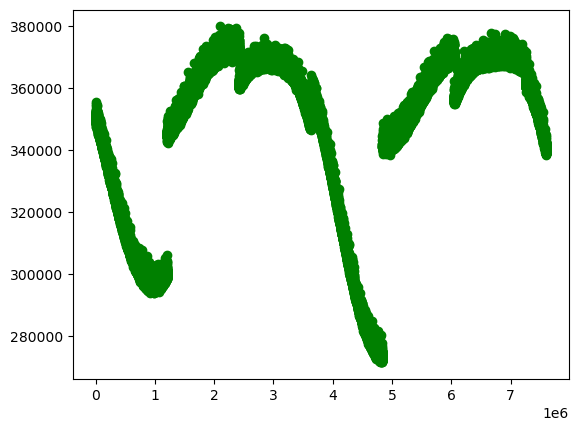

In [ ]:
sinusoidal_11=pd.read_csv('Sinusoidal_11.csv')
sinusoidal_11 = sinusoidal_11.dropna()
x=sinusoidal_11['Time']
y=sinusoidal_11['Est']
plt.scatter(x, y, color='green', label='Sinusoidal_11')

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = sinusoidal_11['Time']
est_pandas=sinusoidal_11['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))
time_numpy[-1]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


7603150

### Spline fit - Magnitude 11 

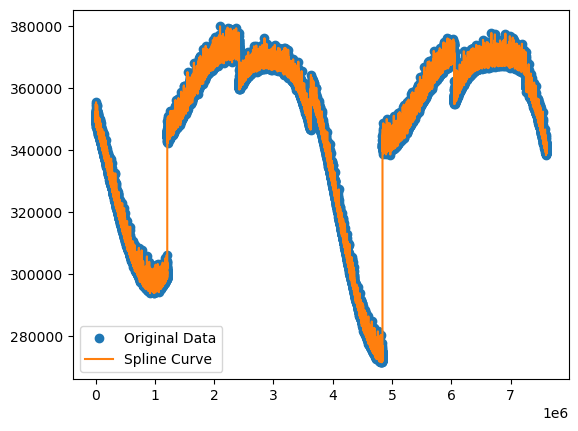

In [ ]:

# Data
x=sinusoidal_11['Time']
y=sinusoidal_11['Est']

# Create spline interpolation function
spl = make_interp_spline(x, y, k=7)

# Generate smooth curve using spline function
x_smooth = np.linspace(0,7603150, 152064)
y_smooth = spl(x_smooth)

# Plot original data and spline curve
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_smooth, y_smooth, label='Spline Curve')
plt.legend()
plt.show()


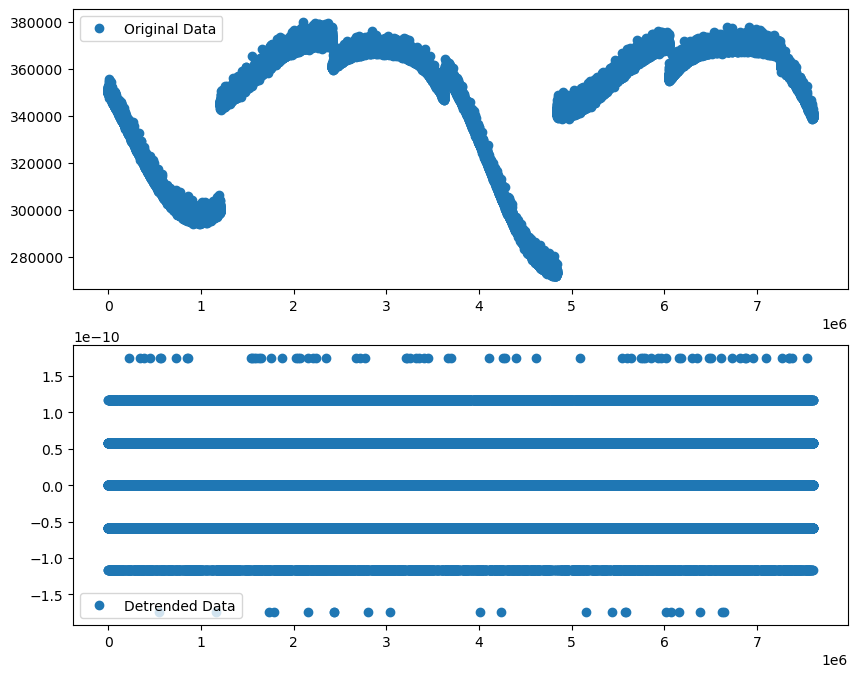

In [ ]:
y_detrended = y - spl(x)

# Plot original data, spline curve, and detrended data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(x, y, 'o', label='Original Data')
#axs[0].plot(x_smooth, y_smooth, label='Spline Curve')
axs[0].legend()
axs[1].plot(x, y_detrended, 'o', label='Detrended Data')
axs[1].legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_11)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.001118570764526013
p-value: 0.662700682304418


# Sinusoidal Magnitude 13

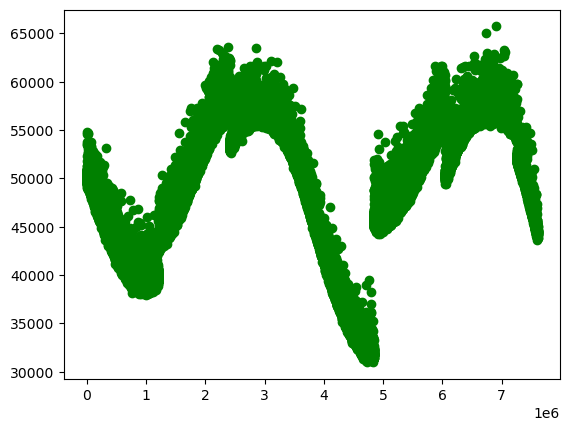

In [ ]:
sinusoidal_13=pd.read_csv('Sinusoidal_13.csv')
sinusoidal_13 = sinusoidal_13.dropna()
x=sinusoidal_13['Time']
y=sinusoidal_13['Est']
plt.scatter(x, y, color='green', label='Sinusoidal_13')

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = sinusoidal_13['Time']
est_pandas=sinusoidal_13['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))
time_numpy[-1]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


7603150

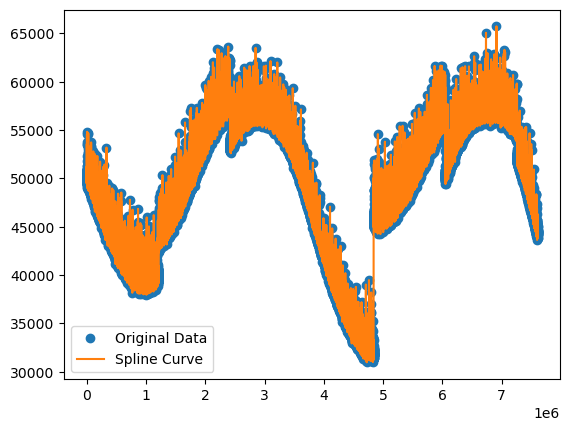

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Data
x=sinusoidal_13['Time']
y=sinusoidal_13['Est']

# Create spline interpolation function
spl = make_interp_spline(x, y, k=7)

# Generate smooth curve using spline function
x_smooth = np.linspace(0,7603150, 152064)
y_smooth = spl(x_smooth)

# Plot original data and spline curve
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_smooth, y_smooth, label='Spline Curve')
plt.legend()
plt.show()


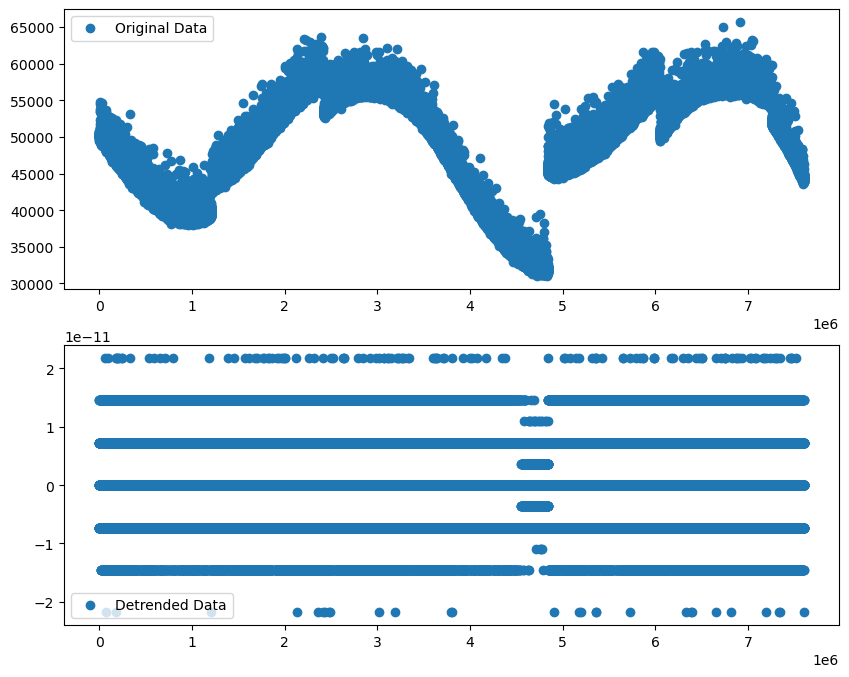

In [ ]:
y_detrended = y - spl(x)

# Plot original data, spline curve, and detrended data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(x, y, 'o', label='Original Data')
#axs[0].plot(x_smooth, y_smooth, label='Spline Curve')
axs[0].legend()
axs[1].plot(x, y_detrended, 'o', label='Detrended Data')
axs[1].legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_13)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.000828400078014531
p-value: 0.7466685886466982


# Sinusoidal Magnitude 15

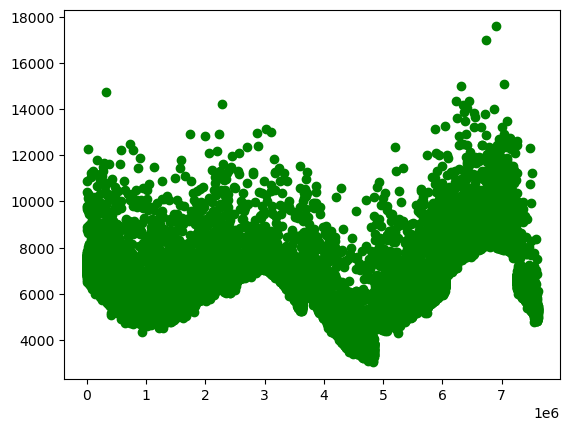

In [ ]:
sinusoidal_15=pd.read_csv('Sinusoidal_15.csv')
sinusoidal_15 = sinusoidal_15.dropna()
x=sinusoidal_15['Time']
y=sinusoidal_15['Est']
plt.scatter(x, y, color='green', label='Sinusoidal_15')

In [ ]:
# We chose 6 clusters based on number of peaks (or visibly 6 clusters)
kmeans = KMeans(6, random_state=0)
kmeans.fit(sinusoidal_15)

KMeans(n_clusters=6, random_state=0)

In [ ]:
identified_clusters = kmeans.fit_predict(sinusoidal_15)

In [ ]:
data_with_clusters = pd.DataFrame(sinusoidal_15.copy())
data_with_clusters['Clusters'] = identified_clusters

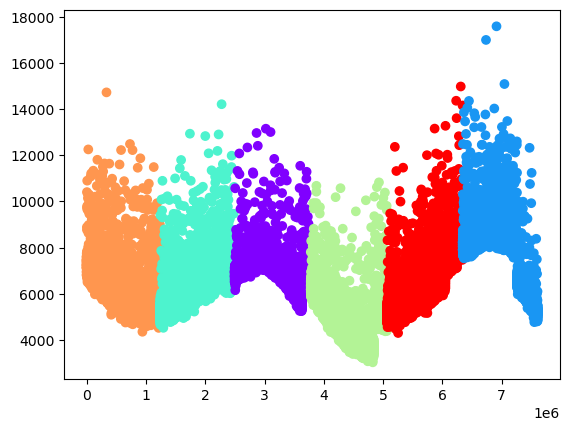

In [ ]:
# Plotting the clusters 
plt.scatter(data_with_clusters['Time'],data_with_clusters['Est'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

In [ ]:
data_with_clusters

,Est,Time,Clusters
0,7424.417236,0,4
1,7484.756836,50,4
2,7134.641602,100,4
3,6927.657715,150,4
4,6798.557861,200,4
...,...,...,...
152059,5003.737549,7602950,1
152060,5153.886963,7603000,1
152061,5328.593994,7603050,1
152062,5239.486572,7603100,1


In [ ]:
# Creating a Dict to store multiple DF based on clusters
df_list = {'0': None, '1': None, '2': None, '3': None, '4': None, '5': None}
for i in range(7):
    df_list[str(i)] = data_with_clusters.loc[data_with_clusters['Clusters'] == i]

In [ ]:
#order list order
for i in df_list.keys():
    print(df_list[i])

               Est     Time  Clusters
49933  6960.427490  2496650         0
49934  6705.734375  2496700         0
49935  7135.837402  2496750         0
49936  6852.375977  2496800         0
49937  6495.243896  2496850         0
...            ...      ...       ...
75578  6337.286377  3778900         0
75579  6317.640137  3778950         0
75580  6501.468994  3779000         0
75581  8374.836914  3779050         0
75582  6188.539307  3779100         0

[25650 rows x 3 columns]
                Est     Time  Clusters
126831  8143.331299  6341550         1
126832  8049.312256  6341600         1
126833  8244.367188  6341650         1
126834  7897.759521  6341700         1
126835  8221.913818  6341750         1
...             ...      ...       ...
152059  5003.737549  7602950         1
152060  5153.886963  7603000         1
152061  5328.593994  7603050         1
152062  5239.486572  7603100         1
152063  5057.061279  7603150         1

[25233 rows x 3 columns]
               Est     T

In [ ]:
# We chose the order list based on the timestamp and cluster number reated to it
order_list = [4,2,0,3,5,1]
ndf = pd.DataFrame(columns = ['Est', 'Time', 'Clusters'])
low_list = []
# Looping over all clusters
for i in range(len(order_list)-1):
    
    # Find min value of 1st Cluster
    low_1 = min(df_list[str(order_list[i])]['Est'])
    # Find min value of 1000 samples from next cluster
    low_2 = min(df_list[str(order_list[i+1])]['Est'][:1000])
    
    # Finding how much we need to move the 2nd cluster
    sub = abs(low_2 - low_1)
    
    # Storing the lowest points to understand visually how much we moved
    low_list.append([low_1, float(df_list[str(order_list[i])].iloc[[-1]]['Time'])])
    low_list.append([low_2, float(df_list[str(order_list[i+1])].iloc[[1]]['Time'])])
       
    # Moving the next cluster by margin amount
    df_list[str(order_list[i+1])]['Est'] -= sub

C:\Users\HP\AppData\Local\Temp\ipykernel_3056\3814616976.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[str(order_list[i+1])]['Est'] -= sub


In [ ]:
ndf = pd.concat(df_list.values())
# Converting 2D array into 2 1D arrays
low_value = []
time_value = []
for i in low_list:
    low_value.append(i[0])
    time_value.append(i[1])

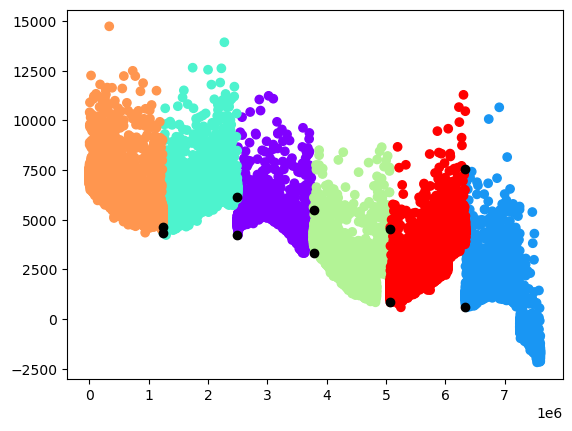

In [ ]:
# Plotting the stitched cluster along with the min values
plt.scatter(ndf['Time'], ndf['Est'],c=ndf['Clusters'],cmap='rainbow')
plt.scatter(time_value, low_value, c='black')
plt.show()

In [ ]:
#Convert Pandas.Series to numpy 1D
# Create a Pandas Series
time_pandas = ndf['Time']
est_pandas=ndf['Est']
# Convert the Series to a 1D NumPy array
time_numpy = time_pandas.to_numpy()
est_numpy = est_pandas.to_numpy()

# Print the array
print(type(time_numpy))
print(type(est_numpy))
print(len(time_numpy))
print(len(est_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
152064
152064


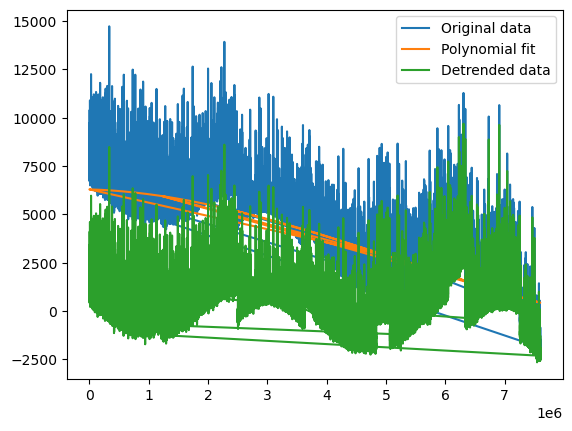

In [ ]:
# Data
x = time_numpy
y = est_numpy
# Fit a degree-3 polynomial to the data
p = np.polyfit(x, y, deg=3)
y_fit = np.polyval(p, x)



# Subtract the polynomial fit from the original data to obtain the detrended data
y_detrended = est_numpy - y_fit

# Plot the original data, the polynomial fit, and the detrended data
plt.plot(time_numpy, est_numpy, label='Original data')
plt.plot(x, y_fit, label='Polynomial fit')
plt.plot(x, y_detrended, label='Detrended data')
plt.legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_15)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.002313596942770481
p-value: 0.36695604647776187


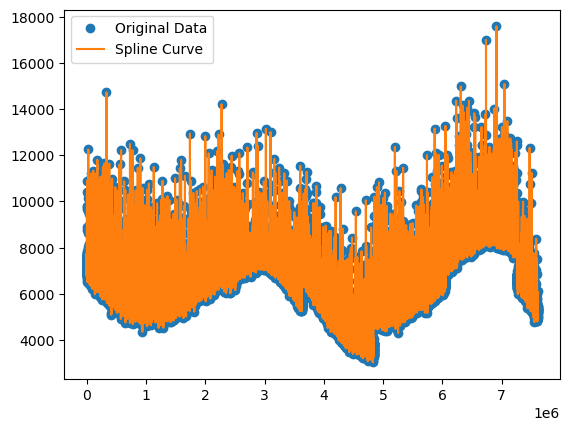

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Generate sample data
x=sinusoidal_15['Time']
y=sinusoidal_15['Est']

# Create spline interpolation function
spl = make_interp_spline(x, y, k=5)

# Generate smooth curve using spline function
x_smooth = np.linspace(0,7603150, 152064)
y_smooth = spl(x_smooth)

# Plot original data and spline curve
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_smooth, y_smooth, label='Spline Curve')
plt.legend()
plt.show()


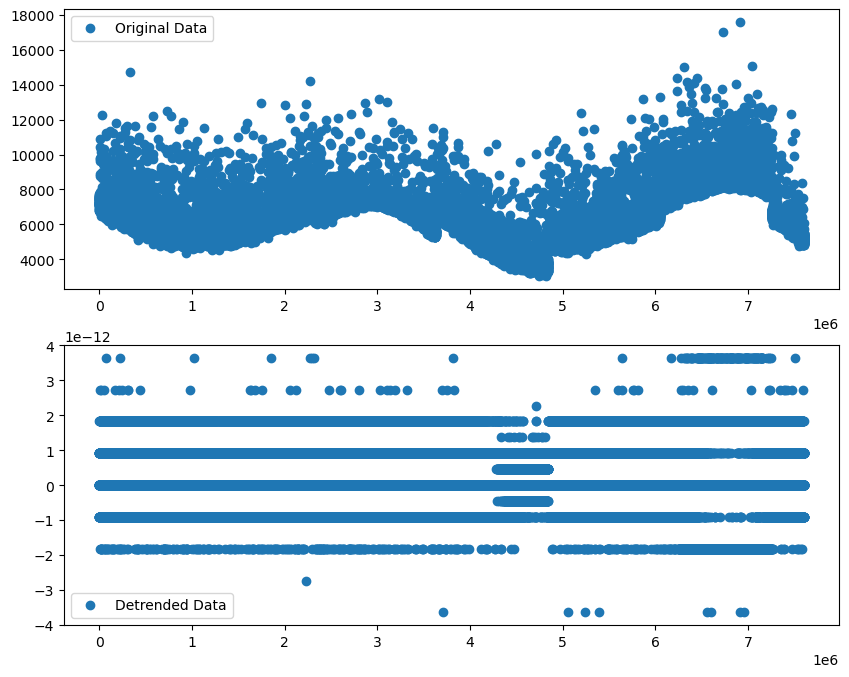

In [ ]:
y_detrended = y - spl(x)

# Plot original data, spline curve, and detrended data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(x, y, 'o', label='Original Data')
#axs[0].plot(x_smooth, y_smooth, label='Spline Curve')
axs[0].legend()
axs[1].plot(x, y_detrended, 'o', label='Detrended Data')
axs[1].legend()
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(y_detrended, y_15)

# print the results
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.0038864549207384643
p-value: 0.1296379104196533
